<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/ANN_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN - Redes neuronales artificiales**


# **Librerías**

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Modelado
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix            # matriz de confusión
from sklearn.metrics import classification_report       # evaluación  Accuracy/Precision/Recall/F1 Score
from sklearn.metrics import ConfusionMatrixDisplay      # matriz de confusión para mapa de calor
#############
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

**Clasificador perceptrón multicapa en Scikit-learn**

Este modelo optimiza la función de pérdida de registro utilizando LBFGS o descenso de gradiente estocástico.

*class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)*

* **solver = lbfgs** converge más rápido en datasets pequeños y puede conseguir mejores resultados

# **Datos**
Datos obtenidos del clustering

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/AgglomerativeClustering_withclusters.csv', delimiter=';')

In [3]:
data

,V_media,SA_media,SI_media,SP_media,SF_media,CL_media,CH_media,CE_media,CB_media,CD_media,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,4.333333,5.000000,4.666667,3.000000,4.000000,5.000000,4.000000,4.333333,3.666667,5.000000,...,0,0,0,1,0,0,0,1,0,1
1,4.000000,5.000000,5.000000,2.000000,4.666667,5.000000,5.333333,6.000000,4.333333,4.000000,...,0,0,0,1,0,0,0,1,0,1
2,4.666667,4.000000,4.666667,3.000000,4.333333,5.000000,5.000000,5.000000,3.333333,2.333333,...,0,0,1,0,0,0,1,0,0,1
3,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,4.666667,4.666667,4.666667,3.666667,...,0,0,0,1,0,0,0,1,0,4
4,2.000000,1.000000,4.666667,1.000000,1.000000,1.000000,1.333333,2.000000,4.000000,5.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.000000,4.666667,3.333333,2.000000,2.000000,5.000000,4.000000,4.333333,3.000000,2.333333,...,0,0,0,0,1,0,0,0,0,4
129,3.000000,4.333333,4.333333,1.333333,2.000000,4.666667,2.000000,3.333333,3.333333,4.333333,...,0,0,0,0,1,0,0,0,0,0
130,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.666667,3.000000,3.666667,3.000000,3.000000,...,0,0,0,0,1,0,0,0,0,5
131,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
data.describe

<bound method NDFrame.describe of       V_media  SA_media  SI_media  SP_media  SF_media  CL_media  CH_media  \
0    4.333333  5.000000  4.666667  3.000000  4.000000  5.000000  4.000000   
1    4.000000  5.000000  5.000000  2.000000  4.666667  5.000000  5.333333   
2    4.666667  4.000000  4.666667  3.000000  4.333333  5.000000  5.000000   
3    5.000000  5.000000  5.000000  4.000000  4.000000  4.666667  4.666667   
4    2.000000  1.000000  4.666667  1.000000  1.000000  1.000000  1.333333   
..        ...       ...       ...       ...       ...       ...       ...   
128  4.000000  4.666667  3.333333  2.000000  2.000000  5.000000  4.000000   
129  3.000000  4.333333  4.333333  1.333333  2.000000  4.666667  2.000000   
130 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  4.666667  3.000000   
131  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
132  5.333333  5.000000  5.333333  5.333333  5.000000  4.333333  4.666667   

     CE_media  CB_media  CD_media  ...  E

# **MLPClassifier**

In [4]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Cluster', axis=1)  # nombre de la columna objetivo, en este caso AREA
y = data['Cluster']

etiquetas=np.unique(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelos**





In [5]:
# Creación de los modelos
MLP_1 = MLPClassifier(hidden_layer_sizes=(512,512), solver = 'lbfgs', max_iter = 1000, random_state = 42)
#MLP_2 = MLPClassifier(hidden_layer_sizes=(10), solver = 'lbfgs', max_iter = 1000, random_state = 42)
#MLP_3 = MLPClassifier(hidden_layer_sizes=(20,20), solver = 'lbfgs', max_iter = 5000, random_state = 42)
#MLP_4 = MLPClassifier(hidden_layer_sizes=(50,50,50), solver = 'lbfgs', max_iter = 5000, random_state = 42)

# Entrenamiento
MLP_1.fit(X_train, y_train)
#MLP_2.fit(X_train, y_train)
#MLP_3.fit(X_train, y_train)
#MLP_4.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(512, 512), max_iter=1000, random_state=42,
              solver='lbfgs')

##**Predicciones y resultados**

In [6]:
# Realizar predicciones en el conjunto de prueba
y_pred = MLP_1.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9629629629629629


In [ ]:
y_test

51     1
69     1
31     4
42     1
117    4
77     0
127    4
56     1
40     1
12     7
81     0
26     1
108    0
100    0
66     1
83     0
4      0
27     0
19     1
123    4
36     1
16     1
18     1
10     1
65     1
44     1
11     7
Name: Cluster, dtype: int64

In [ ]:
# Resultados
resultados = MLP_1.predict(X_test)
resultados_maximos = []
#for i in resultados:
#  resultados_maximos.append(np.where(i==i.max()))
#  resultados_maximos= [int(tupla[0]) for tupla in resultados_maximos]

# Generación del informe de clasificación
print("\n", classification_report(y_pred,y_test, zero_division=True))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.93      1.00      0.96        13
           4       1.00      0.80      0.89         5
           7       1.00      1.00      1.00         2

    accuracy                           0.96        27
   macro avg       0.98      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



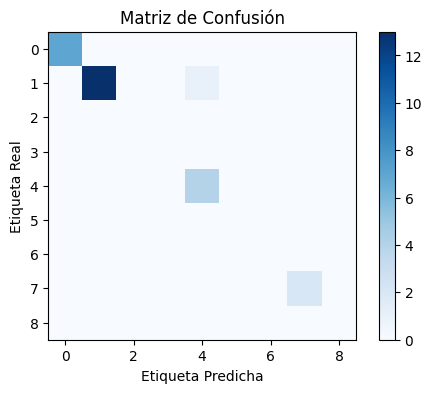

In [8]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=etiquetas)
# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
#classes = ['GENERO_Femenino', 'GENERO_Masculino']  # Ajustar las etiquetas de clase según los datos
#tick_marks = np.arange(len(classes))
#plt.xticks(tick_marks, classes)
#plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

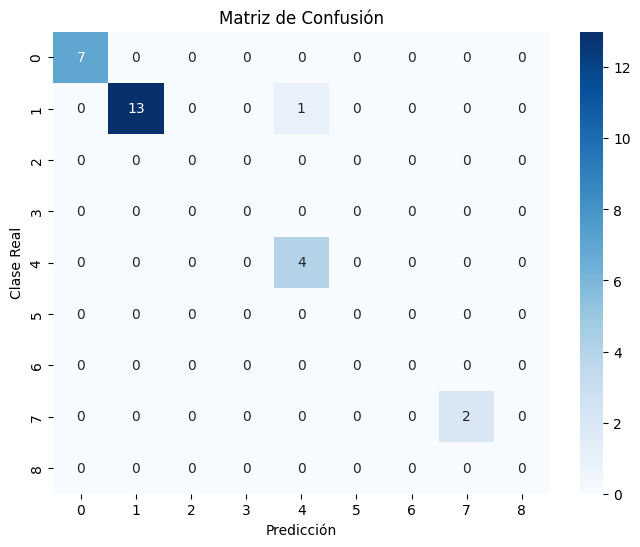

In [9]:
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=cm, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10,10), (64,128), (64,64,64), (512,512)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 42,
        return_train_score = True
       )

grid.fit(X_train, y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)